In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


FIRST, WE ARE PERFORMING EDA ON OUR DATASETS TO GAIN A BETTER UNDERSTANDING OF OUR DATA

In [4]:
#checking the shape
df.shape

(1338, 7)

In [5]:
#checking the types of our variables
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
#getting first 5 rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
#getting last 5 rows
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [8]:
#randomly picking any row
df.sample()

,age,sex,bmi,children,smoker,region,charges
865,40,male,29.9,2,no,southwest,6600.361


In [9]:
#randomly picking 4 rows
df.sample(4)

,age,sex,bmi,children,smoker,region,charges
1304,42,male,24.605,2,yes,northeast,21259.37795
791,19,male,27.600,0,no,southwest,1252.40700
713,20,male,40.470,0,no,northeast,1984.45330
1032,30,female,27.930,0,no,northeast,4137.52270


In [10]:
#checking if there is any null value present in our dataset or not
df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

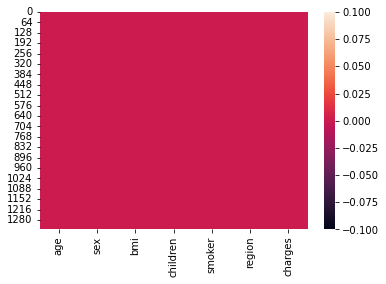

In [12]:
sns.heatmap(df.isnull())

we can see there is no missing data

In [13]:
#statistical summary of our dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


count row showing equal value in every column, hence there is no missing data



In [14]:
#checking the skewness
df.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

<AxesSubplot:>

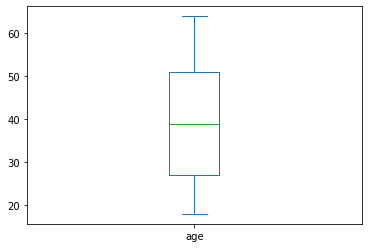

In [15]:
#checking the outliers of columns by plotting boxplot
df['age'].plot.box()

<AxesSubplot:>

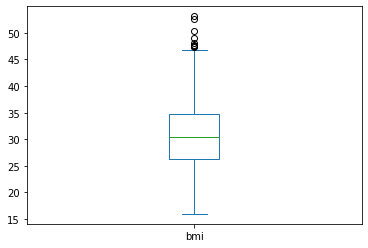

In [16]:
df['bmi'].plot.box()

<AxesSubplot:>

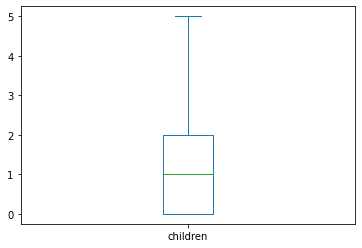

In [17]:
df['children'].plot.box()

from here we can see skewness is present in bmi

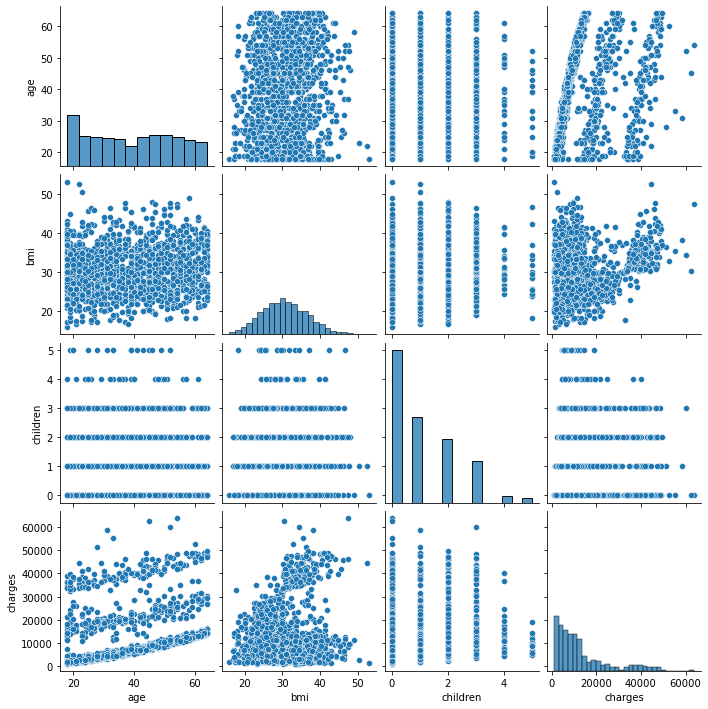

In [18]:
sns.pairplot(df)

In [ ]:
dfcor=df.corr()
dfcor

<AxesSubplot:>

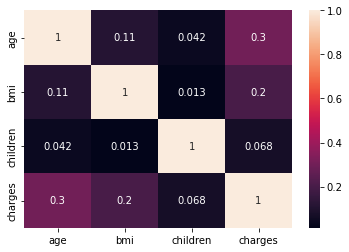

In [20]:
sns.heatmap((dfcor), annot=True)

# Now we will perform bivariate analysis to find relationship between any two variables

<function matplotlib.pyplot.show(close=None, block=None)>

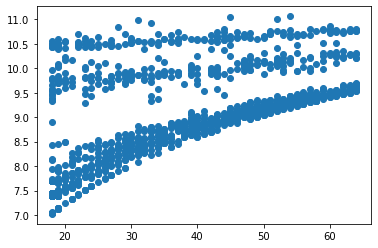

In [25]:
plt.scatter(df['age'], df['charges'])
plt.show

This showing a positive relation kind of curve as the age increasing health insurance cost is also increasing

<function matplotlib.pyplot.show(close=None, block=None)>

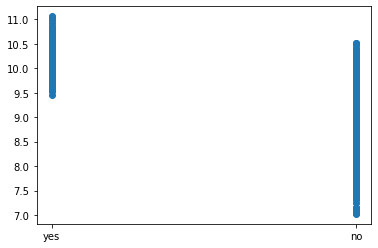

In [26]:
plt.scatter(df['smoker'], df['charges'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

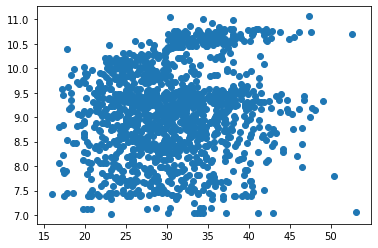

In [27]:
plt.scatter(df['bmi'], df['charges'])
plt.show

# Data Transformation

We do data transformation in order to change the variable so that they can be described as normal distribution

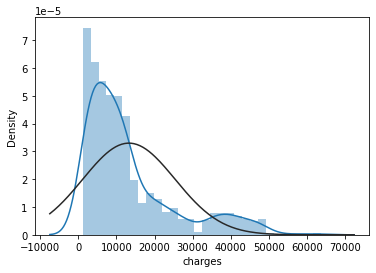

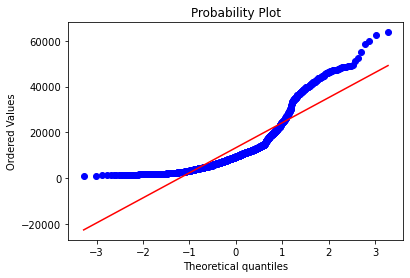

In [21]:
from scipy import stats
from scipy.stats import norm

sns.distplot(df["charges"],fit=norm)
fig = plt.figure()
res = stats.probplot(df["charges"], plot=plt)

For Cleansing of data we are using boxcox here

In [22]:
from scipy.stats import boxcox
df['charges']=boxcox(df['charges'],0)

We have updated our “charges” category with transformed initial variable data

<AxesSubplot:ylabel='Frequency'>

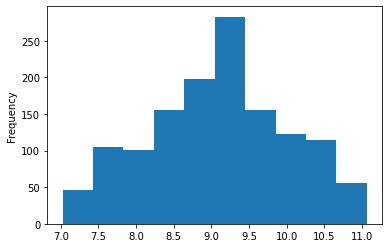

In [24]:
df['charges'].plot.hist()

# As we have three categorical columns present in our dataframe, we first convert them into binary form(0/1)

In [28]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

[Text(0.5, 1.0, 'Distribution of Region')]

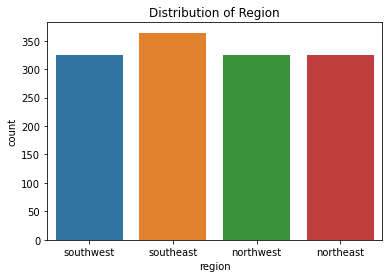

In [31]:
#plotting countplot to get the ratio of regions
sns.countplot(x='region', data=df).set(title='Distribution of Region')

In [29]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

[Text(0.5, 1.0, 'Distribution of Region')]

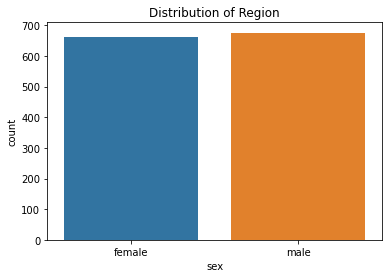

In [32]:
#plotting countplot to get the ratio of regions
sns.countplot(x='sex', data=df).set(title='Distribution of Region')

In [30]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

[Text(0.5, 1.0, 'Distribution of Region')]

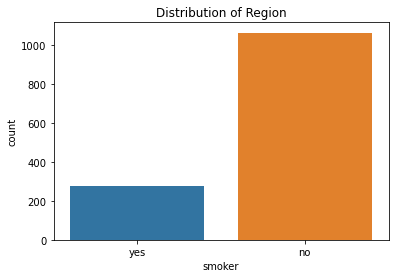

In [33]:
#plotting countplot to get the ratio of regions
sns.countplot(x='smoker', data=df).set(title='Distribution of Region')

In [47]:
sex_copy=pd.get_dummies(df['sex'])
smoker_copy=pd.get_dummies(df['smoker'])
region_copy=pd.get_dummies(df['region'])

df_new=pd.concat([df, sex_copy, smoker_copy, region_copy], axis=1)

df_new.rename(columns={'no':'non-smoker', 'yes':'smokes'}, inplace=True)

df_new=df_new.drop(['sex', 'smoker', 'region'], axis=1)

In [48]:
df_new

,age,bmi,children,charges,female,male,non-smoker,smokes,northeast,northwest,southeast,southwest
0,19,27.900,0,9.734176,1,0,0,1,0,0,0,1
1,18,33.770,1,7.453302,0,1,1,0,0,0,1,0
2,28,33.000,3,8.400538,0,1,1,0,0,0,1,0
3,33,22.705,0,9.998092,0,1,1,0,0,1,0,0
4,32,28.880,0,8.260197,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,0,1,1,0,0,1,0,0
1334,18,31.920,0,7.698927,1,0,1,0,1,0,0,0
1335,18,36.850,0,7.396233,1,0,1,0,0,0,1,0
1336,21,25.800,0,7.604867,1,0,1,0,0,0,0,1


In [49]:
df_new.skew()

age           0.055673
bmi           0.284047
children      0.938380
charges      -0.090098
female        0.020951
male         -0.020951
non-smoker   -1.464766
smokes        1.464766
northeast     1.205161
northwest     1.200409
southeast     1.025621
southwest     1.200409
dtype: float64

In [50]:
#removing outliers using zscore
from scipy import stats
from scipy.stats import zscore

z=np.abs(zscore(df_new))
z

,age,bmi,children,charges,female,male,non-smoker,smokes,northeast,northwest,southeast,southwest
0,1.438764,0.453320,0.908614,0.691394,1.010519,1.010519,1.970587,1.970587,0.565267,0.566418,0.611324,1.765481
1,1.509965,0.509621,0.078767,1.790020,0.989591,0.989591,0.507463,0.507463,0.565267,0.566418,1.635795,0.566418
2,0.797954,0.383307,1.580926,0.759500,0.989591,0.989591,0.507463,0.507463,0.565267,0.566418,1.635795,0.566418
3,0.441948,1.305531,0.908614,0.978513,0.989591,0.989591,0.507463,0.507463,0.565267,1.765481,0.611324,0.566418
4,0.513149,0.292556,0.908614,0.912181,0.989591,0.989591,0.507463,0.507463,0.565267,1.765481,0.611324,0.566418
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.184949,0.989591,0.989591,0.507463,0.507463,0.565267,1.765481,0.611324,0.566418
1334,1.509965,0.206139,0.908614,1.522799,1.010519,1.010519,0.507463,0.507463,1.769076,0.566418,0.611324,0.566418
1335,1.509965,1.014878,0.908614,1.852106,1.010519,1.010519,0.507463,0.507463,0.565267,0.566418,1.635795,0.566418
1336,1.296362,0.797813,0.908614,1.625129,1.010519,1.010519,0.507463,0.507463,0.565267,0.566418,0.611324,1.765481


In [51]:
threshold=3
print(np.where(z>3))

(array([  32,   71,  116,  166,  413,  425,  438,  568,  640,  847,  877,
        932,  937,  969,  984, 1047, 1085, 1116, 1130, 1245, 1272, 1317],
      dtype=int64), array([2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1],
      dtype=int64))


Removing outliers

In [52]:
df_new1=df_new[(z<3).all(axis=1)]
df_new1

,age,bmi,children,charges,female,male,non-smoker,smokes,northeast,northwest,southeast,southwest
0,19,27.900,0,9.734176,1,0,0,1,0,0,0,1
1,18,33.770,1,7.453302,0,1,1,0,0,0,1,0
2,28,33.000,3,8.400538,0,1,1,0,0,0,1,0
3,33,22.705,0,9.998092,0,1,1,0,0,1,0,0
4,32,28.880,0,8.260197,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268661,0,1,1,0,0,1,0,0
1334,18,31.920,0,7.698927,1,0,1,0,1,0,0,0
1335,18,36.850,0,7.396233,1,0,1,0,0,0,1,0
1336,21,25.800,0,7.604867,1,0,1,0,0,0,0,1


In [53]:
df_new.shape

(1338, 12)

In [55]:
df_new1.shape

(1316, 12)

22 rows are deleted as outliers

In [57]:
df_new1.skew()

age           0.049904
bmi           0.193564
children      0.740881
charges      -0.091977
female        0.012172
male         -0.012172
non-smoker   -1.450367
smokes        1.450367
northeast     1.193964
northwest     1.179624
southeast     1.043061
southwest     1.213298
dtype: float64

In [58]:
df_new1.shape

(1316, 12)

We have eleven columns as our X/input variables and one column(Charges) as our Y/target variable.

In [59]:
x=df_new1[['age', 'bmi', 'children', 'female', 'male', 'non-smoker', 'smokes', 'northeast', 'northwest', 'southeast', 'southwest']]
y=df_new1['charges']

In [60]:
x.shape

(1316, 11)

In [61]:
y.shape

(1316,)

Now we are splitting our data into training and testing

In [62]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.33, random_state=42)

In [63]:
x_train.shape

(881, 11)

In [64]:
y_train.shape

(881,)

In [65]:
x_test.shape

(435, 11)

In [66]:
y_test.shape

(435,)

Once our data is ready, we need to call linear regression, so to call it we need to make instance(a variable) of that particular linear regression class

In [67]:
lm=LinearRegression()

In [68]:
lm.fit(x_train, y_train)

LinearRegression()

These are internally calcualted coefficient value, some are +ve some are-ve, +ves are going to add in house prices and -ve coefficient are going to subtract the house prices, so all these are internally done by the coefficient.

In [69]:
lm.coef_

array([ 0.03458542,  0.01558385,  0.10793095,  0.0418736 , -0.0418736 ,
       -0.78653567,  0.78653567,  0.10295673,  0.02571317, -0.08505043,
       -0.04361947])

In [70]:
lm.intercept_

7.6232295223869055

In [71]:
coeff_df= pd.DataFrame(lm.coef_,x.columns,
    columns=['Coefficient'])

print(coeff_df)

            Coefficient
age            0.034585
bmi            0.015584
children       0.107931
female         0.041874
male          -0.041874
non-smoker    -0.786536
smokes         0.786536
northeast      0.102957
northwest      0.025713
southeast     -0.085050
southwest     -0.043619


We can see that from the column smokes, that people who smokes has the highest influence on medical costs calculations. On the contrary non-smokers has the highest negative impact on medical costs.

Now we are checking what is the score, means how much our machine has learnt through training data.

In [72]:
lm.score(x_train, y_train)

0.7599961468341048

0.75 is 75%, means 75% learning is possible, 75% i have understood your data by the model linearRegression lm

In [73]:
#predicting the value
pred=lm.predict(x_test)
print("Predict insurance cost:", pred)
print("Actual insurance cost:", y_test)

Predict insurance cost: [ 9.35396402  8.03663333  9.71399564  8.00352305  8.86268145  9.12941265
  8.62407353  8.22771766  8.36271886  8.40678631  8.32384062  9.36819431
  9.4448924   9.2916741   9.2334926   9.57947652  8.12124822  9.23467691
  9.51845046  8.31290566  8.56115507  8.49682802 10.52865137  9.44288927
  9.45918722  9.13436047  8.6939626   8.46161062  9.24000212  9.34993369
  9.3051052   8.90627178  7.88207304  9.39659366  8.61177302  8.04376028
  9.05924831  9.54494542  8.37673971  8.30765418 11.26636101  7.9887901
  8.79059797  9.6247066  10.90172609  9.30846757  8.15923665  9.37612395
  9.13141694  9.73966847  7.89368503  8.03135085  9.06531326  8.50486123
  9.46374201  8.78352273 10.93089756  9.62769118 11.0637668  10.88652807
  8.10149846  9.62662918 11.30456307  8.56832783  8.89500254  8.97872067
  8.23897363  8.98603847  9.0981515   9.41006525  9.64143168  9.82176404
  9.03135116  8.44623285  9.76984948  9.04878222  8.06180126  8.66170994
  8.87787016  9.02565372  8.

# model Validation

In [74]:
#these are the metrices which are giving me the performance of the module
print('error:')
print('mean absolute error:', mean_absolute_error(y_test, pred))
print('mean squared error:', mean_squared_error(y_test, pred))
print('root mean squared error:', np.sqrt(mean_squared_error(y_test, pred)))

error:
mean absolute error: 0.2750179504965509
mean squared error: 0.18657478378695022
root mean squared error: 0.4319430330343924


In [75]:
#r2 score -->coefficient of determination

from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.7828602800315899


78% change is coming in the value whenever input independent values are changed